In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('knncancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:

df.drop(columns=['id','Unnamed: 32'],inplace=True)

df.head() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [7]:
# normalize
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
knn=KNeighborsClassifier()

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred=knn.predict(X_test)

In [12]:
confusion_matrix(y_test,y_pred)

array([[69,  0],
       [ 3, 42]])

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        69
           M       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
knn=KNeighborsClassifier(p=1)  #manhattan distance
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('classification report with manhattan distance')
print(classification_report(y_test,y_pred))


classification report with manhattan distance
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        69
           M       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
knn=KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('classification report with manhattan distance')
print(classification_report(y_test,y_pred))


classification report with manhattan distance
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        69
           M       1.00      0.91      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [16]:
knn=KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('classification report with manhattan distance')
print(classification_report(y_test,y_pred))


classification report with manhattan distance
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        69
           M       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
train_accuracy=[]
test_accuracy=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)  
    knn.fit(X_train,y_train)

    tr=knn.score(X_train,y_train)
    te=knn.score(X_test,y_test)
    
    train_accuracy.append(tr)
    test_accuracy.append(te)
    

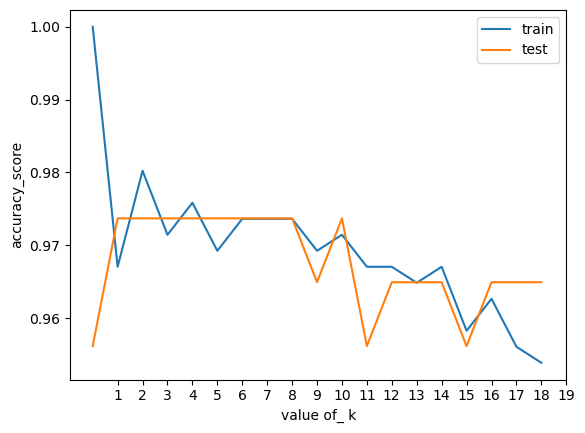

In [18]:
plt.plot(train_accuracy,label='train')
plt.plot(test_accuracy,label='test')
plt.xlabel('value of_ k')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(1,20))
plt.legend()
plt.show()

In [19]:
## merge at 6 7 this is good value of k

In [20]:
## classification use of knn

In [21]:
df1=pd.read_csv('mnist_train.csv')
df2=pd.read_csv('mnist_test.csv')

In [22]:
df3= pd.concat([df1, df2], axis=0, ignore_index=True)


In [23]:
df3.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# this is amulticlass problem

In [25]:
mnist_label=df3['label']
mnist_data=df3.drop(columns=['label'])

In [26]:
def plot_img(img):
    plt.imshow(img.reshape(28,28),cmap='grey')
    plt.axis(False)

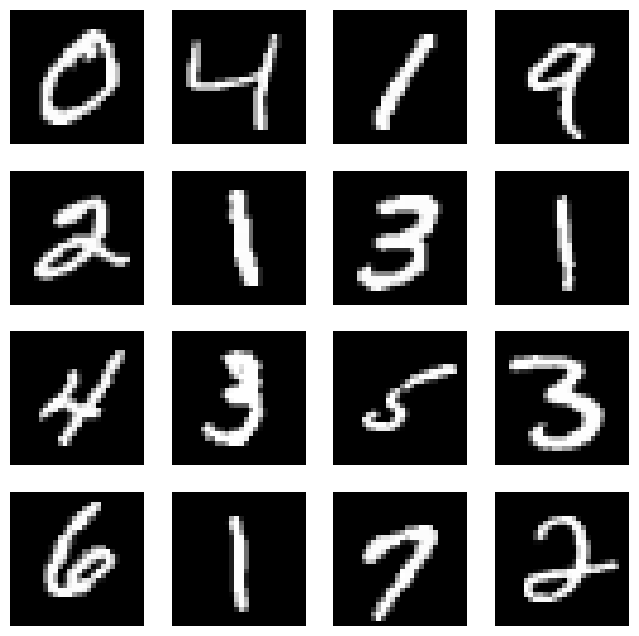

In [27]:
plt.figure(figsize=(8,8))
for i in range(1,17):
    plt.subplot(4,4,i)
    plot_img(mnist_data.iloc[i].values)

In [28]:
## reducing the number of features


In [29]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA(n_components=2) ## 2 variable for visualization purpose



In [31]:
X=pca.fit_transform(mnist_data)

In [32]:
print(X[:5])

[[ 122.26285705 -316.21195583]
 [1010.49763071 -289.95328785]
 [ -58.99715165  393.69308461]
 [-796.96389414 -607.41317916]
 [-391.32022132  729.79110776]]


In [73]:
df=pd.DataFrame(X,columns=['f1','f2'])
df['y']=mnist_label
df.head()

,f1,f2,y
0,122.262857,-316.211956,5
1,1010.497631,-289.953288,0
2,-58.997152,393.693085,4
3,-796.963894,-607.413179,1
4,-391.320221,729.791108,9


<Axes: xlabel='f1', ylabel='f2'>

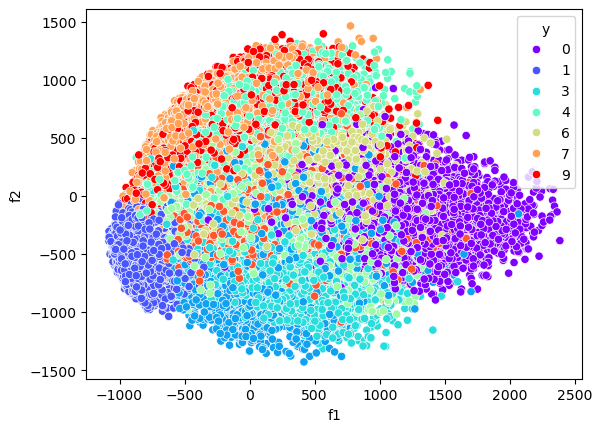

In [81]:
sns.scatterplot(x='f1',y='f2',hue='y',data=df,palette='rainbow')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df[['f1','f2']].values, df['y'].values, test_size=0.33, random_state=42)

In [118]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

knn2=KNeighborsClassifier(n_neighbors=10)

In [120]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [122]:
y_pred=knn2.predict(X_test)


In [128]:
confusion_matrix(y_test,y_pred)

array([[1696,    0,  161,   48,   12,   92,  215,    0,   38,    5],
       [   1, 2440,   39,   35,    4,   29,   13,   13,   27,    2],
       [ 266,   73,  586,  492,   67,  263,  295,   29,  258,   21],
       [  81,   59,  310, 1186,   36,  210,  144,   20,  320,   17],
       [   5,   27,   28,   12, 1020,   50,  113,  420,   11,  458],
       [ 222,   59,  345,  321,  123,  372,  323,   44,  263,   35],
       [ 307,   36,  281,  156,  147,  325,  688,   17,  305,   32],
       [   3,   85,   25,   17,  699,   59,   40, 1045,   25,  457],
       [ 159,   68,  348,  410,   84,  265,  369,   20,  452,   21],
       [  20,   47,   29,    9,  892,   42,   82,  646,   16,  518]])

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67      2267
           1       0.84      0.94      0.89      2603
           2       0.27      0.25      0.26      2350
           3       0.44      0.50      0.47      2383
           4       0.33      0.48      0.39      2144
           5       0.22      0.18      0.20      2107
           6       0.30      0.30      0.30      2294
           7       0.46      0.43      0.44      2455
           8       0.26      0.21      0.23      2196
           9       0.33      0.23      0.27      2301

    accuracy                           0.43     23100
   macro avg       0.41      0.42      0.41     23100
weighted avg       0.42      0.43      0.42     23100



In [130]:
train_accuracy=[]
test_accuracy=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)  
    knn.fit(X_train,y_train)

    tr=knn.score(X_train,y_train)
    te=knn.score(X_test,y_test)
    
    train_accuracy.append(tr)
    test_accuracy.append(te)
    

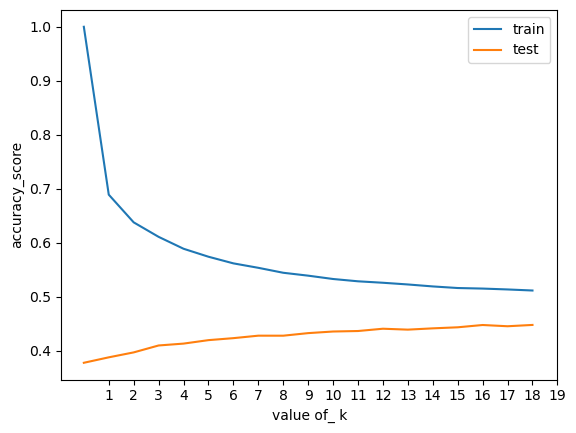

In [131]:
plt.plot(train_accuracy,label='train')
plt.plot(test_accuracy,label='test')
plt.xlabel('value of_ k')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(1,20))
plt.legend()
plt.show()

In [154]:
## try with four principal component or 4 varibale

In [138]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X=pca.fit_transform(mnist_data)



In [140]:
X[:5]

array([[ 122.25559179, -316.22779753,  -51.13140265, -556.87643964],
       [1010.49299249, -289.96710736,  576.1114077 , -485.10829206],
       [ -58.9970499 ,  393.69510619, -162.00718261,  529.18974352],
       [-796.96481633, -607.41795009,  295.52253869,  109.12536598],
       [-391.3193077 ,  729.80044725,   13.90457046, -242.91422809]])

In [142]:
df=pd.DataFrame(X,columns=['f1','f2','f3','f4'])
df['y']=mnist_label
df.head()

,f1,f2,f3,f4,y
0,122.255592,-316.227798,-51.131403,-556.876440,5
1,1010.492992,-289.967107,576.111408,-485.108292,0
2,-58.997050,393.695106,-162.007183,529.189744,4
3,-796.964816,-607.417950,295.522539,109.125366,1
4,-391.319308,729.800447,13.904570,-242.914228,9


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df[['f1','f2','f3','f4']].values, df['y'].values, test_size=0.33, random_state=42)

In [146]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

knn3=KNeighborsClassifier(n_neighbors=10)

In [148]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [150]:
y_pred=knn3.predict(X_test)

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2267
           1       0.91      0.96      0.93      2603
           2       0.68      0.66      0.67      2350
           3       0.68      0.66      0.67      2383
           4       0.54      0.64      0.58      2144
           5       0.49      0.44      0.46      2107
           6       0.67      0.70      0.69      2294
           7       0.56      0.61      0.58      2455
           8       0.48      0.45      0.47      2196
           9       0.53      0.38      0.44      2301

    accuracy                           0.64     23100
   macro avg       0.63      0.64      0.63     23100
weighted avg       0.64      0.64      0.64     23100



In [160]:
train_accuracy=[]
test_accuracy=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)  
    knn.fit(X_train,y_train)

    tr=knn.score(X_train,y_train)
    te=knn.score(X_test,y_test)
    
    train_accuracy.append(tr)
    test_accuracy.append(te)
    

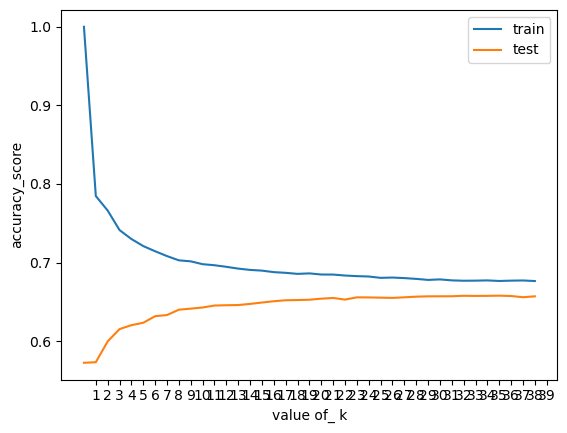

In [162]:
plt.plot(train_accuracy,label='train')
plt.plot(test_accuracy,label='test')
plt.xlabel('value of_ k')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(1,40))
plt.legend()
plt.show()

In [169]:
df['y'].value_counts(normalize=True)

y
1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: proportion, dtype: float64

In [171]:
# for handling missing values knn imputer is very good

In [173]:
from sklearn.impute import KNNImputer

In [ ]:
imputer =KNNImputer(n_neighbors=5)
imputed=imputer.fit_transform(#data)